In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
# load the libraries
import pandas as pd
import numpy as np
import seaborn as sbn
import os 

In [ ]:
# create path to file 
path = "/content/gdrive/My Drive/MLProject/" 
df = pd.read_csv(path + 'train.csv')

In [ ]:
# know our data: Exploratory data analysis. Explore the data
df.shape # gives dimensions of dataframe (n by m)
df.size # number of rows (i.e. number of observations)
df.dtypes
df.describe()

In [ ]:
# convert some features into more appropriate forms
# a. Convert Timestamp from 'object' to 'datetime' object.
df['Timestamp'] = df['Timestamp'].apply(pd.to_datetime)
# lets extract month and hour
df['month'] = df['Timestamp'].dt.month
df['hour'] = df['Timestamp'].dt.hour

In [ ]:
# create a column that converts 'hour' into one of "morning, afternoon, evening"
df['time_of_day'] = pd.cut(df['hour'], bins = [-1, 12, 17, 24], labels = ['morning', 'afternoon', 'evening'])
df['season']  = pd.cut(df['month'], bins = [0, 3, 6], labels = ['winter', 'spring'])

In [ ]:
###########################################################################################################################################


In [ ]:
# Lets look at some plots
# barplot
# heatmap
# histogram
# boxplot
# scatterplot (if regression).

In [ ]:
# Barplot # important for classification because of the output feature. 
# The idea of balanced data
# our output feature is 'Clicked'

clicks = df.groupby(['Clicked'], as_index = False).count()[['Clicked', 'id']]
sbn.catplot(data = clicks, x = 'Clicked', y = 'id', kind = 'bar')

# plot gender distribution in bar
genders = df.groupby(['gender'], as_index = False).count()[['gender', 'id']]
sbn.catplot(data = genders, x = 'gender', y = 'id', kind = 'bar')

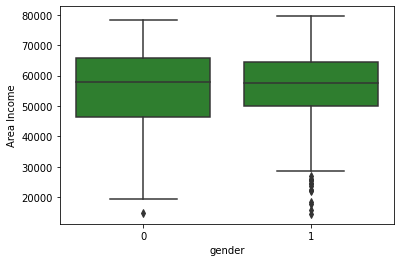

In [ ]:
# Boxplot
sbn.boxplot(data = df, x = 'gender',  y = 'Area Income', color = 'forestgreen')


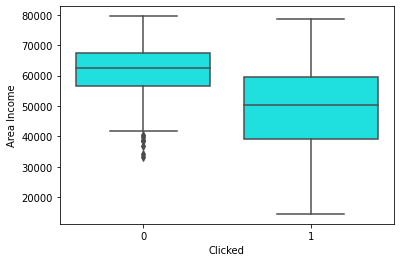

In [ ]:
sbn.boxplot(data = df, x = 'Clicked', y = 'Area Income', color = 'cyan')

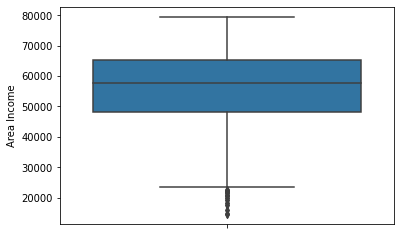

In [ ]:
sbn.boxplot(data = df, y = 'Area Income')

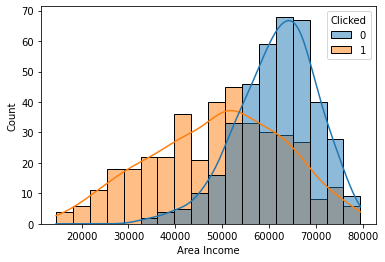

In [ ]:
# some histograms
sbn.histplot(data = df, x = 'Area Income', hue = 'Clicked', kde = True)

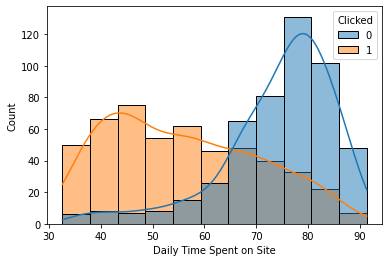

In [ ]:
sbn.histplot(data = df, x = 'Daily Time Spent on Site', hue = 'Clicked', kde = True)

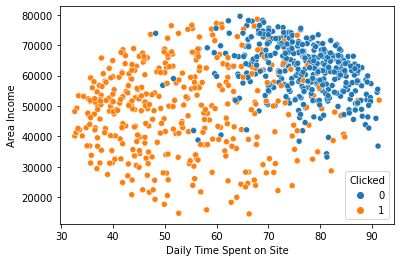

In [ ]:
# scatterplot
sbn.scatterplot(data=df, x = 'Daily Time Spent on Site', y = 'Area Income', hue='Clicked')


In [ ]:
## Check for Missing Values and 'Fix' it.
# identify missing values if any
#df.isnull().sum()

# how to fix it
df.isnull().any(axis = 0)
df.isnull().all(axis = 1)
#df.loc[1]

id                          False
Timestamp                   False
Daily Time Spent on Site    False
Age                         False
Area Income                  True
Daily Internet Usage        False
Ad Topic Line               False
gender                      False
Country                     False
Clicked                     False
month                       False
hour                        False
time_of_day                 False
season                      False
dtype: bool

In [ ]:
## Approach 1
# Extract all the countries and the number of times they appear
country_counts = pd.DataFrame(df['Country'].value_counts())
country_counts = country_counts.rename(columns = {'Country':'count'})

country_counts.head(10)

In [ ]:
# get the positions or indexes that are missing
# to iterate over only the positions whose values are missing

index_ = df[df['Area Income'].isna()].index
index_

# find the overall mean for cases of single-appearance NAs


Int64Index([  5,   9,  13,  22,  25,  27,  29,  34,  37,  40,
            ...
            964, 971, 972, 975, 981, 983, 989, 993, 995, 997],
           dtype='int64', length=225)

In [ ]:
df.describe()

## Import the Datasets

In [ ]:
#pd.read_csv("/content/gdrive/My Drive/MLProject/Sales_Data")
path = "/content/gdrive/My Drive/MLProject/Sales_Data"
all_file_names = os.listdir(path = path)
all_file_names

['Sales_April_2019.csv',
 'Sales_November_2019.csv',
 'Sales_July_2019.csv',
 'Sales_March_2019.csv',
 'Sales_December_2019.csv',
 'Sales_February_2019.csv',
 'Sales_August_2019.csv',
 'Sales_January_2019.csv',
 'Sales_June_2019.csv',
 'Sales_May_2019.csv',
 'Sales_October_2019.csv',
 'Sales_September_2019.csv']

In [ ]:
all_my_data = pd.DataFrame() # crate an empty datafame in which you stack the monthly sales data

for filename in all_file_names:
  temp = pd.read_csv(path + "/"+ filename, index_col = 0)
  all_my_data = pd.concat([all_my_data, temp], axis = 0)

In [ ]:
all_my_data['Quantity Ordered'].unique()

array(['2', nan, '1', '3', '5', 'Quantity Ordered', '4', '7', '6', '8',
       '9'], dtype=object)

#### Save the new combined dataframe as a csv file in our directory

In [ ]:
# save all_my_data as csv file "all_data.csv" 

all_my_data.to_csv('/content/gdrive/My Drive/MLProject/all_data.csv')

## Find the best month for sales

In [ ]:
mydata = pd.read_csv('/content/gdrive/My Drive/MLProject/all_data.csv')


In [ ]:
# extract month and save as month column
mydata['Order Date'].head()
mydata['Month'] = mydata['Order Date'].str[0:2]

In [ ]:
# mydata['Month'].astype('int32') # 'treat' missing values before this works

mydata.isnull().any(axis = 1).sum()
mydata.isnull().all(axis = 1).sum()
# remove NaNs

mydata_clean = mydata[~mydata.isnull().all(axis = 1)]

In [ ]:
#mydata.dropna(axis = 0)

In [ ]:
#mydata_clean['Month'].astype('int32')

mydata_clean['Month'].unique()

# remove the 'Or' 
mydata_clean = mydata_clean[mydata_clean['Month'] != 'Or']

In [ ]:
# convert the month from string to integer (# successful finally)
mydata_clean['Month'] = mydata_clean['Month'].astype('int32')
mydata_clean.dtypes

In [ ]:
# now convert the 'Quantity Ordered' to integer and 'Price Each' to float
mydata_clean['Quantity Ordered']  = mydata_clean['Quantity Ordered'].astype('int32')
mydata_clean['Price Each'] = mydata_clean['Price Each'].astype('float')
mydata_clean.dtypes

# Create 'Sales' Column that multiplies 'Price Each' and 'Quantity Ordered'
mydata_clean['Sales'] = mydata_clean['Quantity Ordered'] * mydata_clean['Price Each']
mydata_clean.dtypes

Order ID             object
Product              object
Quantity Ordered      int32
Price Each          float64
Order Date           object
Purchase Address     object
Month                 int32
Sales               float64
dtype: object

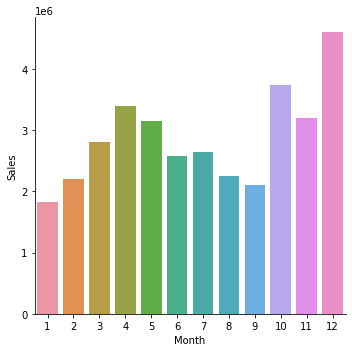

In [ ]:
# use groupby to group by month
monthly_sales = mydata_clean.groupby(['Month'], as_index =  False).sum()[['Month', 'Sales']]

# plot the monthly sales
sbn.catplot(data = monthly_sales, x = 'Month', y = 'Sales', kind = 'bar')